## Installing Modules

In [2]:
!pip install pandas-datareader

### Importing the required packages

In [37]:
import pandas_datareader.data as pdr
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

### Getting the data to analyse

In [18]:
start_date = datetime(2017,2,27)
end_date = dt.today()
pd_stc = pdr.get_data_stooq('TSLA')

In [32]:
pd_stc.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-27,162.430,180.6800,161.17,177.90,306590613
2023-01-26,159.965,161.4200,154.76,160.27,234815090
2023-01-25,141.905,146.4100,138.07,144.43,192734347
2023-01-24,143.000,146.5000,141.10,143.89,158699056
2023-01-23,135.870,145.3793,134.27,143.75,203119211


<AxesSubplot:xlabel='Date'>

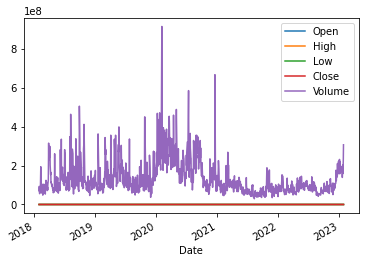

In [20]:
pd_stc.plot()

<AxesSubplot:xlabel='Date'>

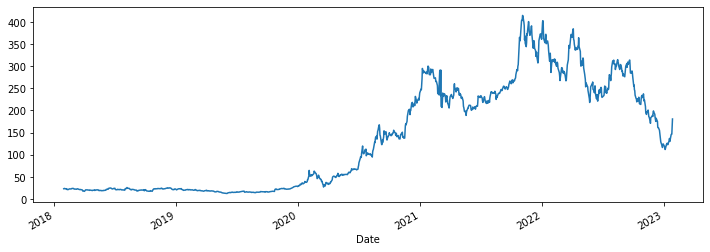

In [23]:
#plotting for high
pd_stc['High'].plot(figsize = (12,4))

<AxesSubplot:xlabel='Date'>

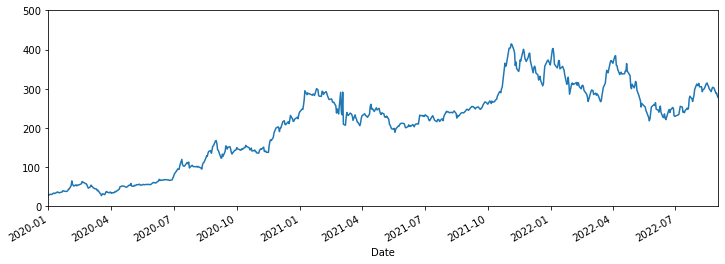

In [69]:
#plotting for high with a threshold
pd_stc['High'].plot(xlim = ['2020-01-01','2022-09-01'], ylim=[0,500] ,figsize = (12,4))


## We also have parameters like color,line-style,kind

### Indexing in date-time data

In [41]:
index = pd_stc.loc['2022-09-01':'2020-01-01'].index
share_open = pd_stc.loc[index]['Open']

In [42]:
index

DatetimeIndex(['2022-09-01', '2022-08-31', '2022-08-30', '2022-08-29',
               '2022-08-26', '2022-08-25', '2022-08-24', '2022-08-23',
               '2022-08-22', '2022-08-19',
               ...
               '2020-01-15', '2020-01-14', '2020-01-13', '2020-01-10',
               '2020-01-09', '2020-01-08', '2020-01-07', '2020-01-06',
               '2020-01-03', '2020-01-02'],
              dtype='datetime64[ns]', name='Date', length=673, freq=None)

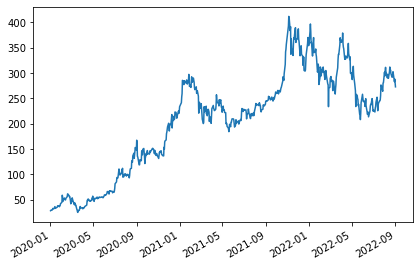

In [46]:
figure, axis = plt.subplots()
plt.tight_layout()
figure.autofmt_xdate() #Auto formatting done in x axis
axis.plot(index,share_open)

### Implementing DateTime functions

In [47]:
# We can reset index if we want to convert the date indexing in the datetime format

pd_stc = pd_stc.reset_index()
pd_stc.head()

,Date,Open,High,Low,Close,Volume
0,2023-01-27,162.430,180.6800,161.17,177.90,306590613
1,2023-01-26,159.965,161.4200,154.76,160.27,234815090
2,2023-01-25,141.905,146.4100,138.07,144.43,192734347
3,2023-01-24,143.000,146.5000,141.10,143.89,158699056
4,2023-01-23,135.870,145.3793,134.27,143.75,203119211


In [48]:
pd.to_datetime(pd_stc['Date'])

0      2023-01-27
1      2023-01-26
2      2023-01-25
3      2023-01-24
4      2023-01-23
          ...    
1253   2018-02-05
1254   2018-02-02
1255   2018-02-01
1256   2018-01-31
1257   2018-01-30
Name: Date, Length: 1258, dtype: datetime64[ns]

In [49]:
# We can revert back to date as index.
pd_stc.set_index('Date',drop=True, inplace=True)

In [50]:
pd_stc.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-27,162.430,180.6800,161.17,177.90,306590613
2023-01-26,159.965,161.4200,154.76,160.27,234815090
2023-01-25,141.905,146.4100,138.07,144.43,192734347
2023-01-24,143.000,146.5000,141.10,143.89,158699056
2023-01-23,135.870,145.3793,134.27,143.75,203119211


#### Few properties of DateTime

In [55]:
# Current DateTime
date = dt.today()

In [56]:
date.date()

datetime.date(2023, 1, 30)

In [57]:
date.year

2023

In [58]:
date.day

30

In [60]:
date.weekday()

0

#### Time Resampling

In [61]:
pd_stc.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-27,162.430,180.6800,161.17,177.90,306590613
2023-01-26,159.965,161.4200,154.76,160.27,234815090
2023-01-25,141.905,146.4100,138.07,144.43,192734347
2023-01-24,143.000,146.5000,141.10,143.89,158699056
2023-01-23,135.870,145.3793,134.27,143.75,203119211


<AxesSubplot:xlabel='Date'>

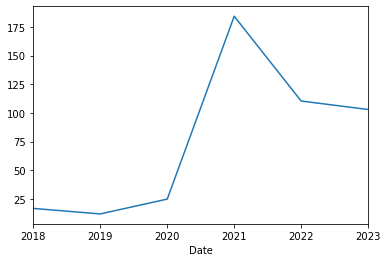

In [66]:
# We have 5 years data. Now we want to resample the data.
pd_stc.resample(rule='A').min()['Open'].plot()

Rule A means resampling based on frequency and year

<AxesSubplot:xlabel='Date'>

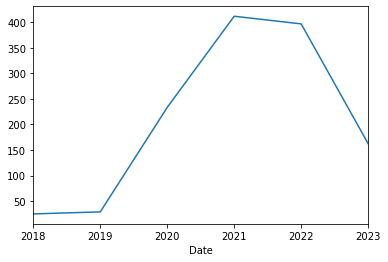

In [65]:
pd_stc.resample(rule='A').max()['Open'].plot()

<AxesSubplot:xlabel='Date'>

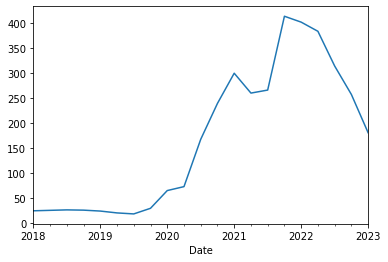

In [68]:
pd_stc.resample(rule='QS').max()['High'].plot()

Rule QS tells us about the frequency and quarterly

### Rolling

Rolling means number of days to leave to create adjacent aggregate.

In [70]:
pd_stc['Open: 30 days rolling'] = pd_stc['Open'].rolling(30).mean()

In [71]:
pd_stc.head(31)

,Open,High,Low,Close,Volume,Open: 30 days rolling
Date,,,,,,
2023-01-27,162.430,180.6800,161.1700,177.90,306590613,NaN
2023-01-26,159.965,161.4200,154.7600,160.27,234815090,NaN
2023-01-25,141.905,146.4100,138.0700,144.43,192734347,NaN
2023-01-24,143.000,146.5000,141.1000,143.89,158699056,NaN
2023-01-23,135.870,145.3793,134.2700,143.75,203119211,NaN
2023-01-20,128.680,133.5100,127.3466,133.42,138858136,NaN
2023-01-19,127.260,129.9900,124.3082,127.17,170291880,NaN
2023-01-18,136.555,136.6800,127.0100,128.78,195680318,NaN
2023-01-17,125.695,131.7000,125.0200,131.49,186476985,NaN


<AxesSubplot:xlabel='Date'>

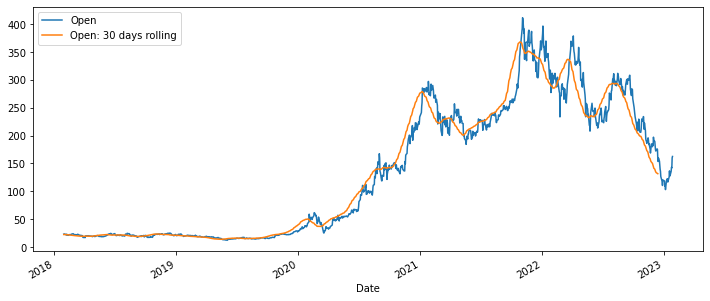

In [72]:
pd_stc[['Open','Open: 30 days rolling']].plot(figsize=(12,5))